<a href="https://colab.research.google.com/github/Poojakamble24/Deep_Learning/blob/main/Handwritten%20Digit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Handwritten Digit Classification Project


In [107]:
from warnings import filterwarnings
filterwarnings("ignore")

### Load MNIST dataset


In [108]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [109]:
x_train.shape

(60000, 28, 28)

In [110]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [111]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

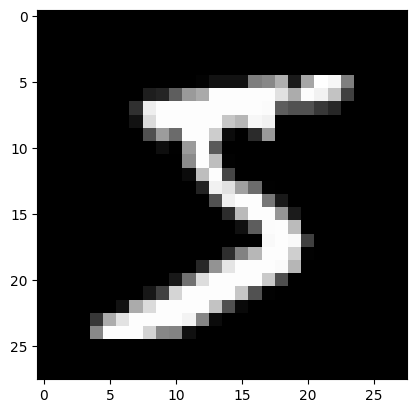

In [112]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0],cmap = "gray")

In [113]:
x_test.shape

(10000, 28, 28)

In [114]:
y_test.shape

(10000,)

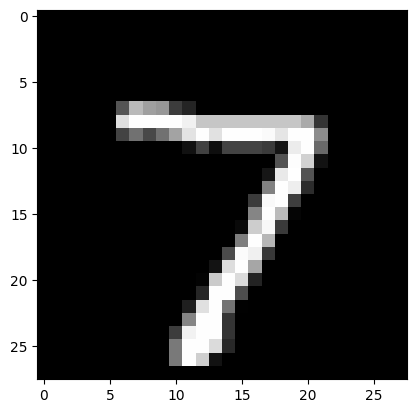

In [115]:
plt.imshow(x_test[0],cmap = "gray")

### Displaying first 9 images from train data


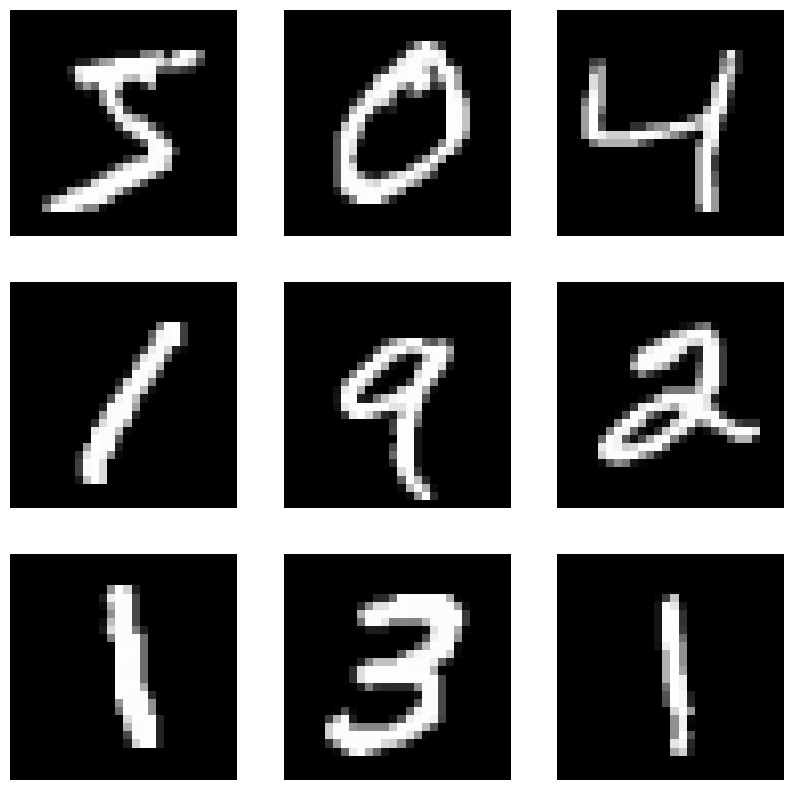

In [116]:


plt.figure(figsize = (10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i],cmap = "gray")
    plt.axis("off")

In [117]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [118]:
len(np.unique(y_train))

10

### This is a multiclass classification problem
### Preprocess image data
### Pixel value 0-255



In [119]:
x_train_scl = x_train.astype ("float32")/255
x_test_scl = x_test.astype ("float32")/255
x_test_scaled = x_test/255

In [120]:
x_train_scl[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

 ### one hot encode the y features


In [121]:
from keras.utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [122]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [123]:
y_train_cat[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [124]:
y_test[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [125]:
y_test_cat[0:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [126]:
x_train.shape

(60000, 28, 28)

In [127]:
y_train.shape

(60000,)

### Build the neural network

### Simple Covnet architecture


In [128]:
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout



In [129]:
model = Sequential()

# added input layer
model.add(Input(shape = (28,28,1)))

# add convulation layer
model.add(Conv2D(filters = 32, kernel_size = (3,3),  activation = 'relu'))

# Add max poling1
model.add(MaxPooling2D(pool_size = (2,2)))

# add conculation layer
model.add(Conv2D(filters = 64, kernel_size = (3,3),  activation = 'relu'))

#  max poling2
model.add(MaxPooling2D(pool_size = (2,2)))

# add flatten layer
model.add(Flatten())

# add droup layer
model.add(Dropout (0.5))

# output layer
model.add(Dense(y_train_cat.shape[1],activation = 'softmax'))



In [130]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_2 (Dropout)         (None, 1600)             

In [131]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [132]:
hist = model.fit(x_train_scl,y_train_cat,epochs = 15,validation_split = 0.1)


Epoch 1/15
1688/1688 [==============================] - 9s 5ms/step - loss: 0.2299 - accuracy: 0.9285 - val_loss: 0.0673 - val_accuracy: 0.9820
Epoch 2/15
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0839 - accuracy: 0.9743 - val_loss: 0.0458 - val_accuracy: 0.9878
Epoch 3/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0637 - accuracy: 0.9801 - val_loss: 0.0379 - val_accuracy: 0.9893
Epoch 4/15
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0543 - accuracy: 0.9823 - val_loss: 0.0305 - val_accuracy: 0.9920
Epoch 5/15
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0489 - accuracy: 0.9848 - val_loss: 0.0317 - val_accuracy: 0.9910
Epoch 6/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0435 - accuracy: 0.9855 - val_loss: 0.0295 - val_accuracy: 0.9915
Epoch 7/15
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0408 - accuracy: 0.9872 - val_loss: 0.0363 - val_accuracy:

Plot the learning curve

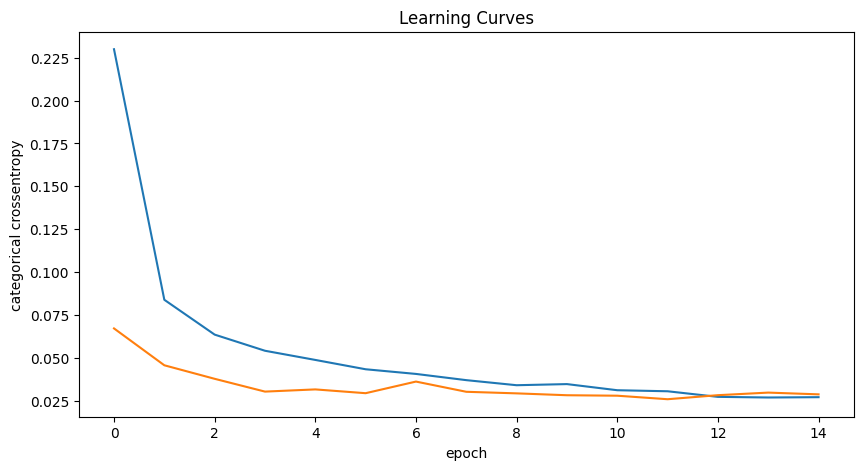

In [133]:
plt.figure(figsize=(10, 5))
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Learning Curves')
plt.ylabel('categorical crossentropy')
plt.xlabel('epoch')
plt.show()

 ### Evaluate the model in train and test

In [134]:
model.evaluate(x_train_scl,y_train_cat)


1875/1875 [==============================] - 5s 3ms/step - loss: 0.0107 - accuracy: 0.9970


[0.010650014504790306, 0.9969666600227356]

In [135]:
model.evaluate(x_test_scl,y_test_cat)

313/313 [==============================] - 1s 4ms/step - loss: 0.0228 - accuracy: 0.9926


[0.022821249440312386, 0.9926000237464905]

### Predict results for train and test

In [136]:
yprob_train = model.predict(x_train_scl)
yprob_test = model.predict(x_test_scl)

313/313 [==============================] - 1s 2ms/step


In [137]:
yprob_train[0:5]

array([[8.93816271e-12, 1.90235969e-11, 9.62924962e-10, 3.60751548e-03,
        1.35245482e-12, 9.96391952e-01, 9.46593567e-11, 3.68754627e-09,
        1.00979236e-07, 3.38998746e-07],
       [9.99996901e-01, 6.79332197e-15, 2.11364920e-07, 8.27830929e-11,
        3.51227068e-11, 6.96121633e-11, 1.02384854e-06, 1.90242648e-11,
        1.01080303e-07, 1.74451418e-06],
       [2.64631090e-13, 6.08562161e-08, 8.68206451e-10, 1.19839350e-09,
        9.99982834e-01, 1.25035496e-10, 4.93405455e-11, 1.35120927e-05,
        2.45754759e-08, 3.53010455e-06],
       [1.02653672e-08, 9.99980211e-01, 6.00062663e-07, 1.38926154e-12,
        1.24068720e-05, 6.69558714e-11, 2.77774088e-08, 4.03978174e-06,
        2.67542168e-06, 2.69146234e-08],
       [1.15949650e-09, 3.31941002e-10, 9.91622784e-09, 1.91896454e-08,
        4.07431507e-05, 5.21032495e-10, 1.41858124e-13, 4.00546414e-05,
        4.58378163e-05, 9.99873281e-01]], dtype=float32)

In [138]:
import numpy as np
ypred_train = np.argmax(yprob_train,axis=1)
ypred_test = np.argmax(yprob_test,axis = 1)


In [139]:
yprob_train[0:5]

array([[8.93816271e-12, 1.90235969e-11, 9.62924962e-10, 3.60751548e-03,
        1.35245482e-12, 9.96391952e-01, 9.46593567e-11, 3.68754627e-09,
        1.00979236e-07, 3.38998746e-07],
       [9.99996901e-01, 6.79332197e-15, 2.11364920e-07, 8.27830929e-11,
        3.51227068e-11, 6.96121633e-11, 1.02384854e-06, 1.90242648e-11,
        1.01080303e-07, 1.74451418e-06],
       [2.64631090e-13, 6.08562161e-08, 8.68206451e-10, 1.19839350e-09,
        9.99982834e-01, 1.25035496e-10, 4.93405455e-11, 1.35120927e-05,
        2.45754759e-08, 3.53010455e-06],
       [1.02653672e-08, 9.99980211e-01, 6.00062663e-07, 1.38926154e-12,
        1.24068720e-05, 6.69558714e-11, 2.77774088e-08, 4.03978174e-06,
        2.67542168e-06, 2.69146234e-08],
       [1.15949650e-09, 3.31941002e-10, 9.91622784e-09, 1.91896454e-08,
        4.07431507e-05, 5.21032495e-10, 1.41858124e-13, 4.00546414e-05,
        4.58378163e-05, 9.99873281e-01]], dtype=float32)

In [140]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [141]:
y_test[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [142]:
yprob_test[0:5]

array([[3.12262521e-10, 1.17672170e-12, 2.26304721e-07, 3.55043497e-08,
        3.86552938e-14, 1.04485084e-12, 9.11478175e-19, 9.99999642e-01,
        4.05142697e-10, 1.23568441e-07],
       [1.76487461e-07, 2.29946963e-07, 9.99997497e-01, 3.14805820e-10,
        7.01171135e-11, 3.61605277e-14, 2.09435893e-06, 1.06253235e-11,
        5.33951976e-08, 2.84778815e-11],
       [5.47880408e-09, 9.99917865e-01, 4.60175364e-08, 1.42543077e-09,
        5.35329200e-05, 7.93746437e-08, 1.43803490e-07, 2.54705483e-05,
        2.84794351e-06, 7.09177925e-08],
       [9.98822033e-01, 1.03912939e-12, 2.22316089e-06, 4.60608334e-08,
        1.73968004e-08, 5.77483604e-07, 1.14012486e-03, 3.69883359e-08,
        2.18077366e-05, 1.31151937e-05],
       [2.97761105e-09, 2.00489070e-11, 3.44567125e-10, 1.69910266e-11,
        9.99996543e-01, 2.27477863e-11, 4.47733006e-09, 9.05711686e-11,
        7.97309525e-08, 3.38167001e-06]], dtype=float32)

### Plot the confusion matrix


     

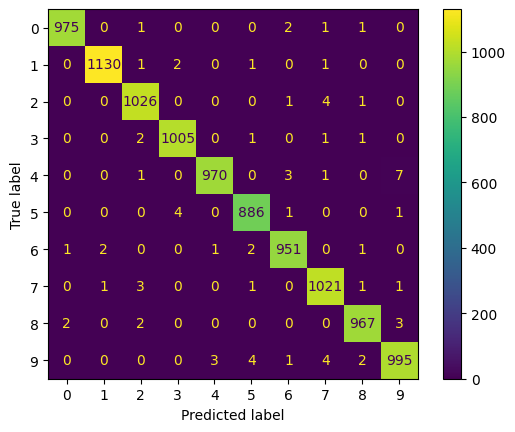

In [143]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,ypred_test)
